# Dam Fund Analysis - Data Exploration and Analysis

We will use  data exploration processes on the dataset that we have cleaned up.
We will use  graphs to visualize the data, then move on to some mathemetical descriptions of the data, and then come up with some hypotheses to explain our findings.

## Defining the Question

1. How are the donations distributed? s
    1. Is there an overall increase or decrease in donations?
    2. Is there a pattern? Is the pattern weekly or monthly?
    3. Are there any spikes? If yes, can we hypothesize why?
2. In how much time will the Dam target of be reached?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

path = './'
data = pd.read_pickle(path+'individual_contributions.pkl')

data.head()

,Bank,Name,Amount,Date
0,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,25.0,2018-09-10
1,AL BARAKA BANK (PAKISTAN) LTD,SARFARAZ 0117,100.0,2018-09-10
2,AL BARAKA BANK (PAKISTAN) LTD,HAMNA ZEESHAN 0117,100.0,2018-09-10
3,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,200.0,2018-09-10
4,AL BARAKA BANK (PAKISTAN) LTD,NOMAN 0117,200.0,2018-09-10


## Part A: Finding distribution, historical trends and correlations

#### Plotting individual contributions
We make plots that give us an initial view of how the amounts are distribution i.e. how much money each person usually pays

We used 99th quantile to filter out the outlier values while retaining the maximum data.We use log scale since it is used to convert the skewed distributions into normal distribution.Since many of the algorithms in data assume that the data is normal and calculate various stats assuming this. Hence the more the data is close to normal the more it fits the assumption.

Text(0,0.5,'Relative Frequency')

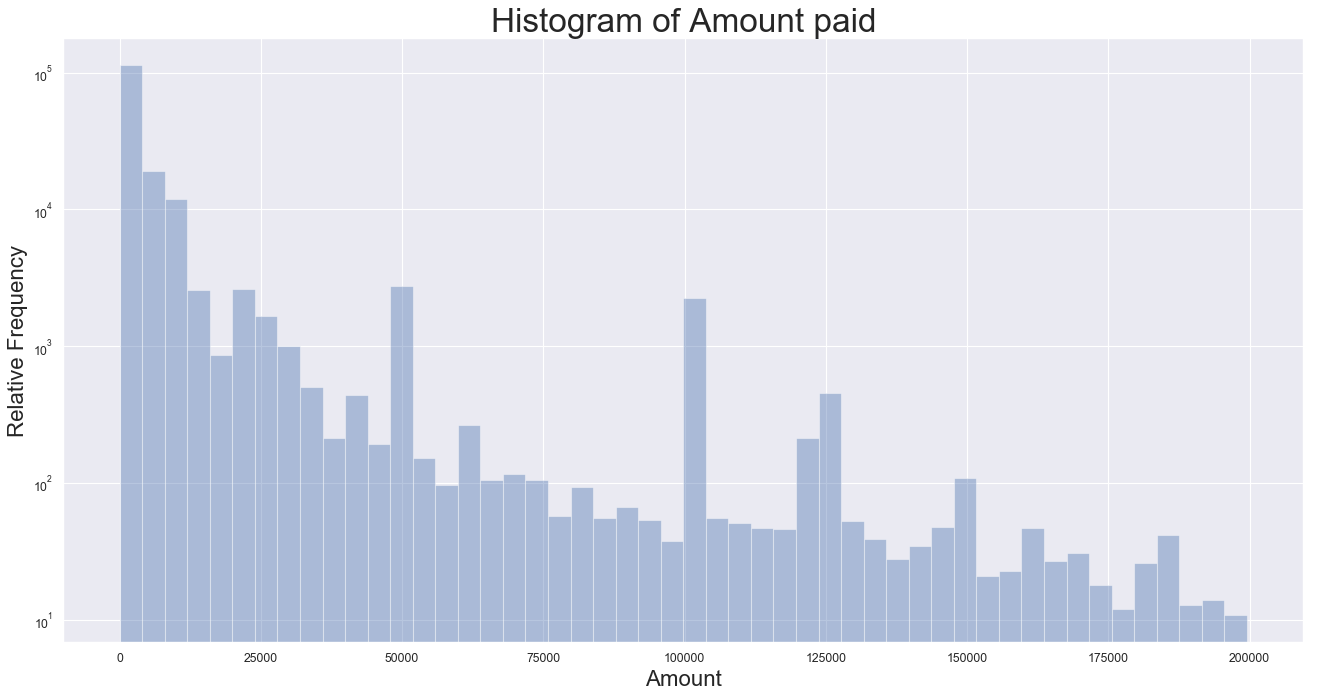

In [28]:
plot_data = data['Amount'][data['Amount']<data['Amount'].quantile(0.99)]
fig = plt.figure(figsize=(20,10), dpi=80)
sns.set(style="darkgrid")
sns.distplot(plot_data,hist_kws={'log':True},kde = False,bins= 50)
plt.title('Histogram of Amount paid',fontsize = 30)
plt.xlabel('Amount',fontsize = 20)
plt.ylabel('Relative Frequency',fontsize = 20)

#### Explaining outliers

In [47]:
##Code that allows us to check what the outliers are and who the donors are. 
plot_data = data['Amount'][data['Amount']<data['Amount'].quantile(0.99)]
outlier_data = data['Amount'][~(data['Amount']<data['Amount'].quantile(0.99))]
outlier_data = pd.DataFrame(data=outlier_data)
print('Number of outliers', len(outlier_data))


Number of outliers 1756


In [65]:
# Find the top 10 outlier doners
x = outlier_data .nlargest(10, 'Amount')['Amount']
data.loc[data['Amount'].isin(x)]

,Bank,Name,Amount,Date
19754,SBP BSC,ENGRO CORPORATION LTD,5.000000e+07,2018-09-25
43724,National Bank of Pakistan,F C BALOCHISTAN,4.000000e+07,2018-09-17
53855,Habib Bank Limited,BAHRIA TOWN LTD UBL,6.750000e+07,2018-08-09
59210,MCB Bank Limited,Debit Credit Card Settlement ADC,5.832347e+07,2018-09-11
59953,Meezan Bank Limited,M PERVAIZ BHATTI,5.000000e+07,2018-09-11
61292,SBP BSC,PAK ARMY,5.820719e+08,2018-09-11
77671,Meezan Bank Limited,QARSAHI IND,5.000000e+07,2018-09-12
87084,Habib Bank Limited,HBL ISLAMIC CHARITY HBL ISLAMIC,1.000000e+08,2018-08-17
137646,Askari Bank Limited,HQ CWO SPD,2.010938e+08,2018-08-28
154710,SBP BSC,SBP & Its Subsidries Employee's Contributions,4.427950e+07,2018-08-15


#### Final Takeaway:

Can any meaningful conclusion be drawn about how much money each person gives simply by looking at individual contributions? 

Answer: The histogram tells us that mostly people donate amounts in the range of 0-25000 and as the amount increases the frequence of people who donate it decreases.

### Finding Daily Patterns
We are now interested in finding how the contributions change over time - in terms of the sum of contributions over a day, the number of contributions over a day, and see their pattern over a time-series plot.

Text(0,0.5,'Total Amount')

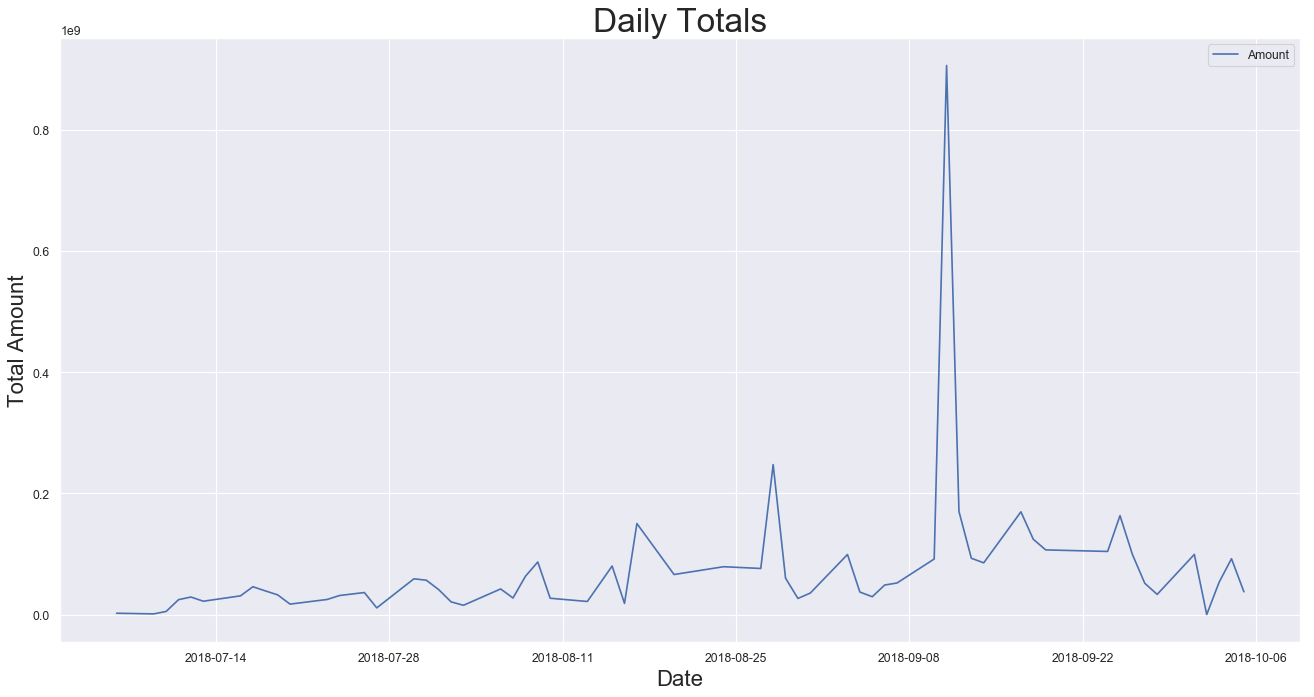

In [71]:
daily_totals = data.groupby('Date').sum()
daily_counts = data.groupby('Date').count()
# Plot of how daily totals change with date
fig = plt.figure(figsize=(20,10), dpi=80)
# sns.set(style="darkgrid")
sns.lineplot(data = daily_totals)
plt.title('Daily Totals',fontsize = 30)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Total Amount',fontsize = 20)


Text(0,0.5,'Total Count')

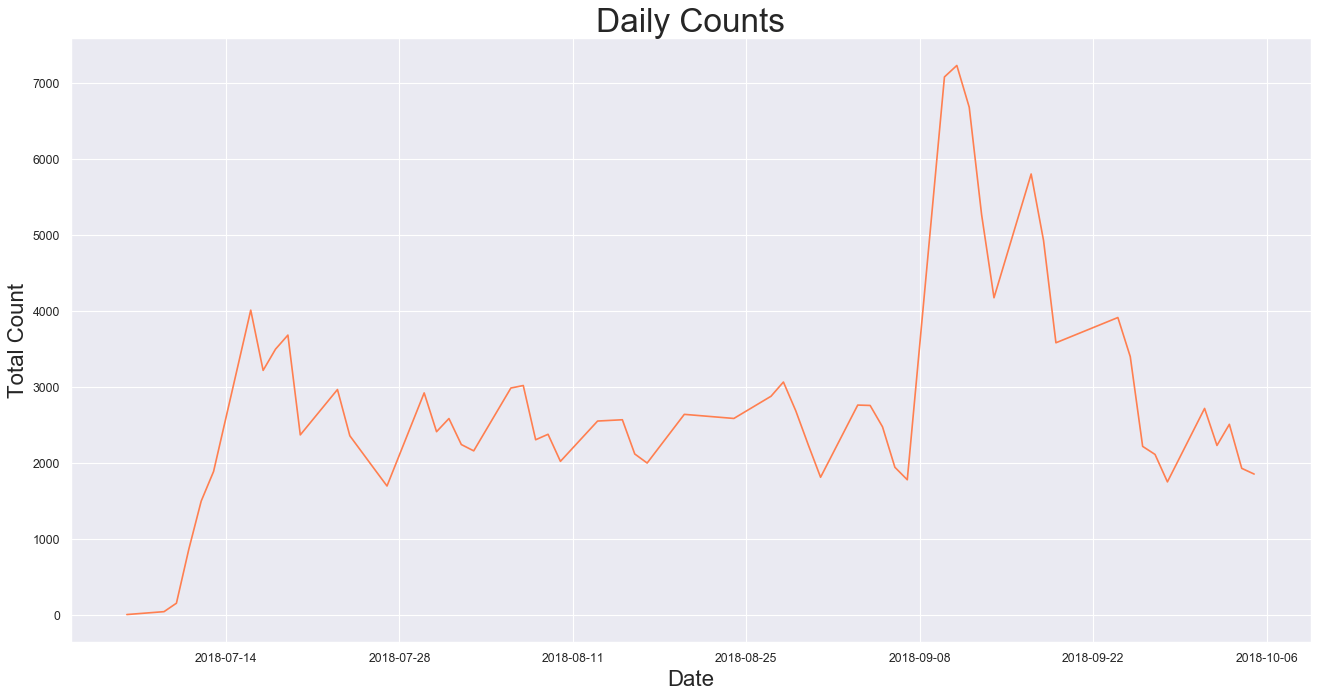

In [68]:
# Plot of how daily counts change with date
fig = plt.figure(figsize=(20,10), dpi=80)
sns.lineplot(data = daily_counts['Amount'],color = 'coral')
plt.title('Daily Counts',fontsize = 30)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Total Count',fontsize = 20)

### Finding Weekly Patterns 
We need to know if there is any meaningful pattern to be found by adding a Day column into the dataframe, and then visualizing to see if the day of the week matters.

We can see from the below graph that the contributions are the maximum overall on tuesday.

In [72]:
# Write a heuristic to add the Day column using the Date values
import datetime as dt
daily_totals['Date'] = daily_totals.index
daily_totals['day'] =  daily_totals['Date'].dt.weekday_name

In [73]:
daily_totals.head()

,Amount,Date,day
Date,,,
2018-07-06,2402300.00,2018-07-06,Friday
2018-07-09,1346261.00,2018-07-09,Monday
2018-07-10,5374641.00,2018-07-10,Tuesday
2018-07-11,24830020.00,2018-07-11,Wednesday
2018-07-12,29174820.91,2018-07-12,Thursday


Text(0,0.5,'Total Amount')

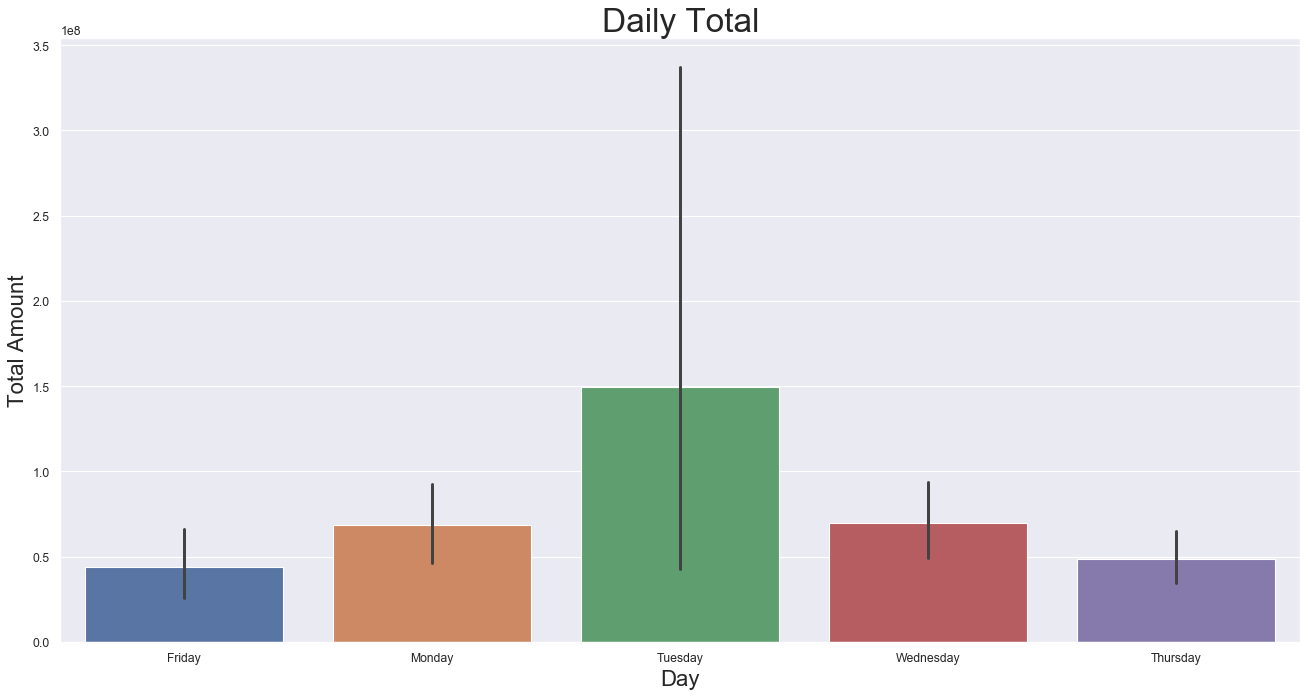

In [80]:
fig = plt.figure(figsize=(20,10), dpi=80)
sns.barplot(x="day", y="Amount",data = daily_totals)
plt.title('Daily Total',fontsize = 30)
plt.xlabel('Day',fontsize = 20)
plt.ylabel('Total Amount',fontsize = 20)

Text(0,0.5,'Total Count')

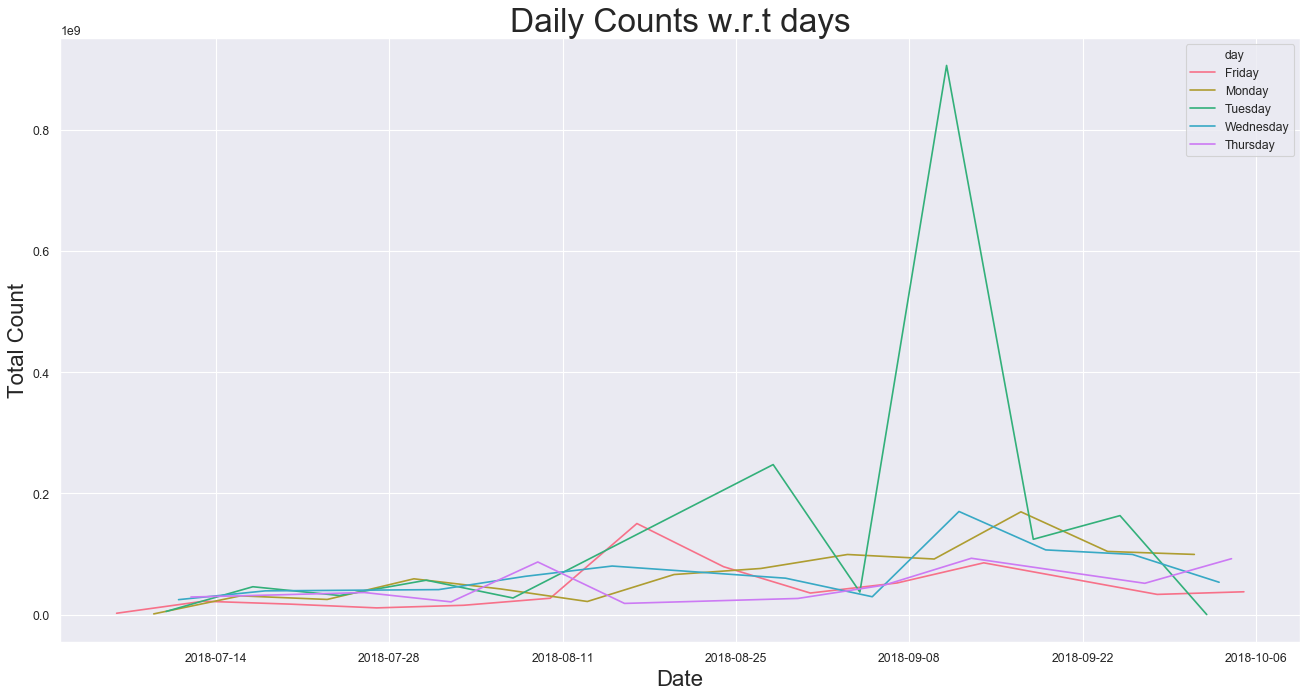

In [7]:
palette = sns.color_palette("husl", 5)
fig = plt.figure(figsize=(20,10), dpi=80)
sns.set(style="darkgrid")
sns.lineplot(x="Date", y="Amount",hue = "day",markers=True, dashes=False,palette=palette,data = daily_totals)
plt.title('Daily Counts w.r.t days',fontsize = 30)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Total Count',fontsize = 20)

### Finding Correlations 

Now that we have roughly visualized how the data is spread over a daily basis and a weekly basis, we now wanted to know if there is any correlation between Day of the week and Amount, or between Time of the month and Amount (i.e. whether the 1st of the month is more likely to have higher donations than, say, the 20th of the month). If you want to find the correlation between an output, or a dependent variable, and a set of independent variables, or inputs, then you need to run some sort of a regression. In our case, since the output is a continuous variable (Amount), we want to run a linear regression. 

Before we move in, think about this: would you want to check whether the correlation between exact date of the month (1st vs 2nd vs 3rd), or would you want to roughly set boundaries as the start of the month (1st - 10th), mid (11th - 20th), and end (20th - 31st). What do you think would give a higher correlation? Which gives more meaningful information?


#### Preprocessing variables
Linear Regression can not be done with categorical variables. So how do you run a regression with them? There are many methods to preprocess the categorical variables in a way that they become numerical. The basic principle behind all of them is to assign some number to them. The exact methods will be left to your discovery, but some links are provided below.


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
daily_totals['day_numeric'] = daily_totals['Date'].dt.day

In [99]:
daily_totals.head()

,Amount,Date,day,day_int,day_numeric
Date,,,,,
2018-07-06,2402300.00,2018-07-06,Friday,0,6
2018-07-09,1346261.00,2018-07-09,Monday,1,9
2018-07-10,5374641.00,2018-07-10,Tuesday,3,10
2018-07-11,24830020.00,2018-07-11,Wednesday,4,11
2018-07-12,29174820.91,2018-07-12,Thursday,2,12


In [102]:
def interval(x):
    if x<=10:
        return 0
    elif x<=20:
        return 1
    else:
        return 2
 

In [106]:
daily_totals['interval'] = daily_totals['day_numeric'].apply(interval)
daily_totals.head()

,Amount,Date,day,day_int,day_numeric,interval
Date,,,,,,
2018-07-06,2402300.00,2018-07-06,Friday,0,6,0
2018-07-09,1346261.00,2018-07-09,Monday,1,9,0
2018-07-10,5374641.00,2018-07-10,Tuesday,3,10,0
2018-07-11,24830020.00,2018-07-11,Wednesday,4,11,1
2018-07-12,29174820.91,2018-07-12,Thursday,2,12,1


We used label encoder to transofrm the categorical variable into a unique integer. This integer was converted into one hot encoding using the OneHotEncoder.

In [107]:
input_value = np.array(daily_totals['interval'])
label_encoder = LabelEncoder()
integer = label_encoder.fit_transform(input_value)
print('classes',label_encoder.classes_)
print('input_value',input_value[0:5])
print('integer_value',integer[0:5])
onehot_encoder = OneHotEncoder(sparse=False)
integer = integer.reshape(len(integer), 1)
output = onehot_encoder.fit_transform(integer)
print('output_value',output[0:5])

classes [0 1 2]
input_value [0 0 0 1 1]
integer_value [0 0 0 1 1]
output_value [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [108]:
#Code to extract a Time_of_month numeric variable from the DateTime object #
X = output
y = np.array(daily_totals['Amount'])

reg_TimeOfMonth = LinearRegression()
reg_TimeOfMonth.fit(X,y)

print(reg_TimeOfMonth.score(X, y))

0.05715849515367133


 An R^2 of 0.06 means that 6 percent of the variance in y is predictable from X which is the time interval

In [84]:
#Code toconvert the Day variable, defined in Part 3, into a numeric #
input_value = np.array(daily_totals['day'])
label_encoder = LabelEncoder()
integer = label_encoder.fit_transform(input_value)
daily_totals['day_int'] = integer
print('classes',label_encoder.classes_)
print('input_value',input_value[0:5])
print('integer_value',integer[0:5])
onehot_encoder = OneHotEncoder(sparse=False)
integer = integer.reshape(len(integer), 1)
output = onehot_encoder.fit_transform(integer)
print('output_value',output[0:5])


classes ['Friday' 'Monday' 'Thursday' 'Tuesday' 'Wednesday']
input_value ['Friday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
integer_value [0 1 3 4 2]
output_value [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [85]:
daily_totals.head()

,Amount,Date,day,day_int
Date,,,,
2018-07-06,2402300.00,2018-07-06,Friday,0
2018-07-09,1346261.00,2018-07-09,Monday,1
2018-07-10,5374641.00,2018-07-10,Tuesday,3
2018-07-11,24830020.00,2018-07-11,Wednesday,4
2018-07-12,29174820.91,2018-07-12,Thursday,2


In [86]:
X = output
y = np.array(daily_totals['Amount'])
reg_Day = LinearRegression()
reg_Day.fit(X,y)
# Returns the coefficient of determination R^2 of the prediction.
print(reg_Day.score(X, y))

0.09804373913688191


 An R^2 of 0.09 means that 9 percent of the variance in y is predictable from X which is the Day variable

### Subjective Question
Would running a Multiple Linear Regression using both X variables, instead of a seperate regressions on Day_of_week and Time_of_month, provide us with the correct conclusions? What information would that give us?

Answer: A linear relationship is assumed between the dependent variable and the independent variables. If we add alot of independent variables to a multiple linear regression model then it will always increase the amount of explained variance in the dependent variable y.Hence, adding too many independent variables without any justification may cause the model to over fit.
Information :It helps us to understand how much will our dependent variable change when we change the independent variables.  For instance, we can tell you how much the amount is expected to increase/decrease as the Day_of_week and Time_of_month changes.
We can also predict future trends using Multiple Linear Regression. For instance, we can predict that what will be the approximate number of donations during a particular time of month?
